<h1>Redirecting_Customers_to_Subscription</h1>

<p>In today's market, many companies have mobile application provide free product/services. So that, customer attempy to buy subscription.

The objective of this model is to predict which user will not subscribe to paid subscription, So that we can increase the marketting efforts by which they convert them to paid users.

In this we I took the data of an company , which tell us behaviour of user application.

THe data is only for first 24-hours because app is free to use for only first 24-hours after that user have to pay.

Company want to target the user and predict wheather they buy or not.</p>



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser
import time

<h1>Part 1</h1>

In [2]:
dataset = pd.read_csv('/content/drive/MyDrive/Machine Learning Models/Redirecting customer to subscription/appdata10.csv')

dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [3]:
dataset.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
dataset['hour'] = dataset.hour.str.slice(1,3).astype(int)

In [5]:
dataset

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,2013-05-09 13:46:17.871,3,13,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,2013-05-09 13:47:52.875,0
49996,169179,2013-04-09 00:05:17.823,1,0,35,"Cycle,Splash,Home,RewardsContainer",4,0,1,0,NaN,0
49997,302367,2013-02-20 22:41:51.165,2,22,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,NaN,0
49998,324905,2013-04-28 12:33:04.288,6,12,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,2013-04-28 12:35:38.709,0


In [6]:
dataset2 = dataset.copy().drop(columns = ['user', 'first_open','screen_list', 'enrolled', 'enrolled_date'])

dataset2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


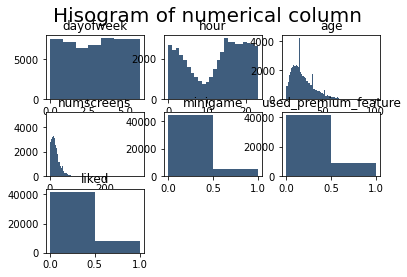

In [7]:
plt.suptitle('Hisogram of numerical column', fontsize= 20)
for i in range(1, dataset2.shape[1] + 1) :
  plt.subplot(3, 3, i)
  f = plt.gca()
  f.set_title(dataset2.columns.values[i-1])

  vals = np.size(dataset2.iloc[:, i - 1].unique())

  plt.hist(dataset2.iloc[:, i-1], bins = vals, color= '#3F5D7D')

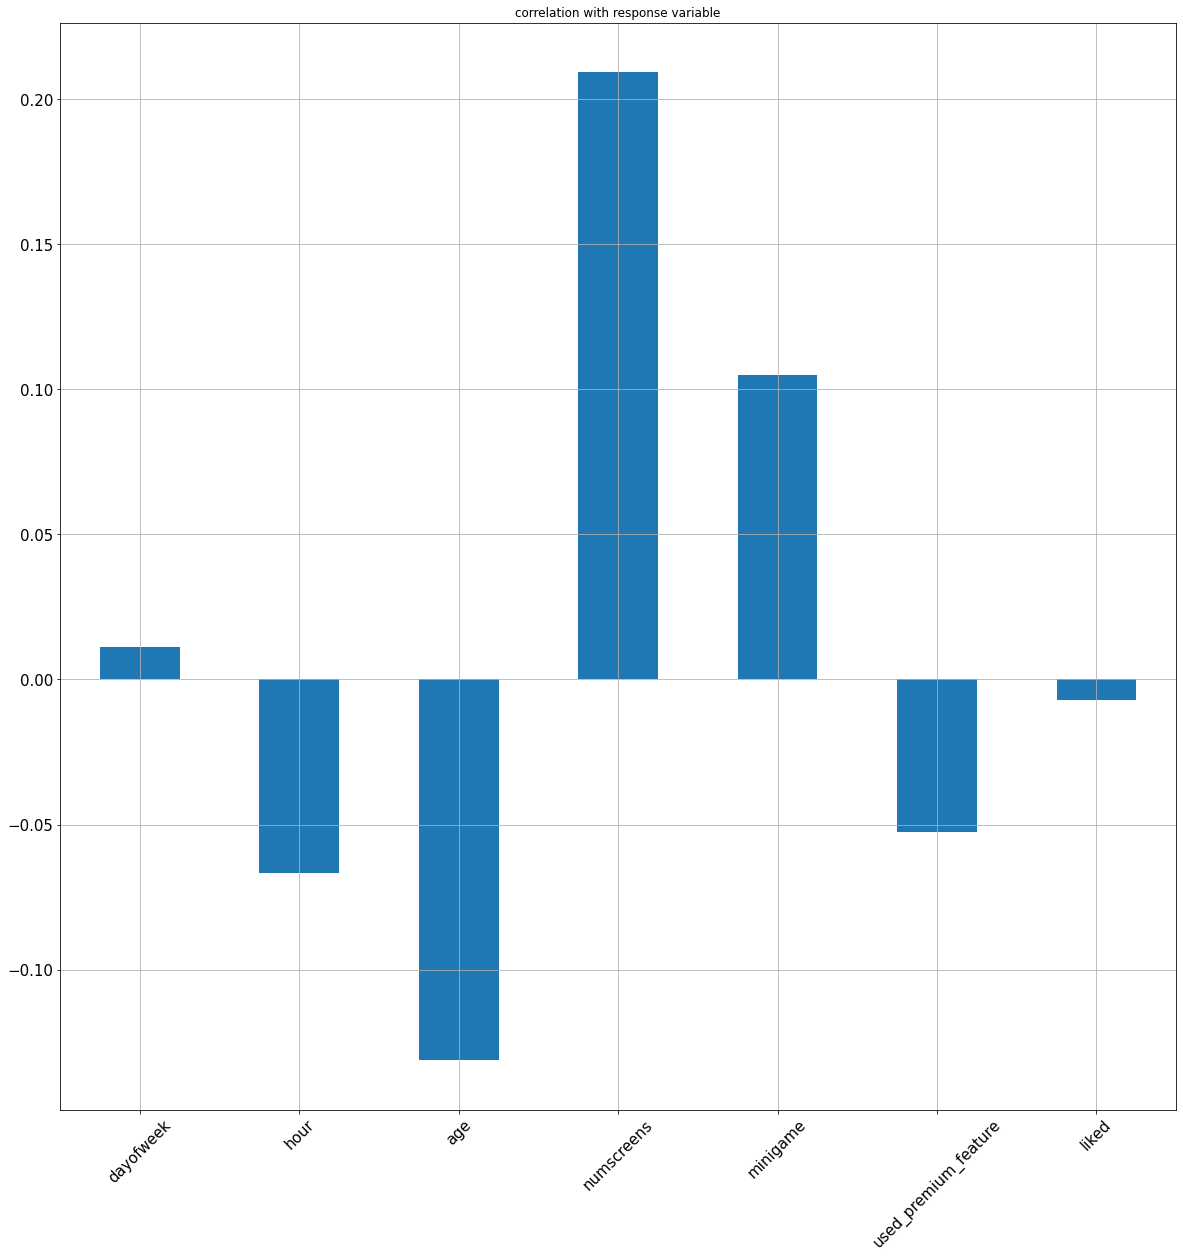

In [8]:
#correlation plot

dataset2.corrwith(dataset.enrolled).plot.bar(figsize= (20,20),
                                             title = 'correlation with response variable',
                                             fontsize= 15, rot= 45, grid = True)

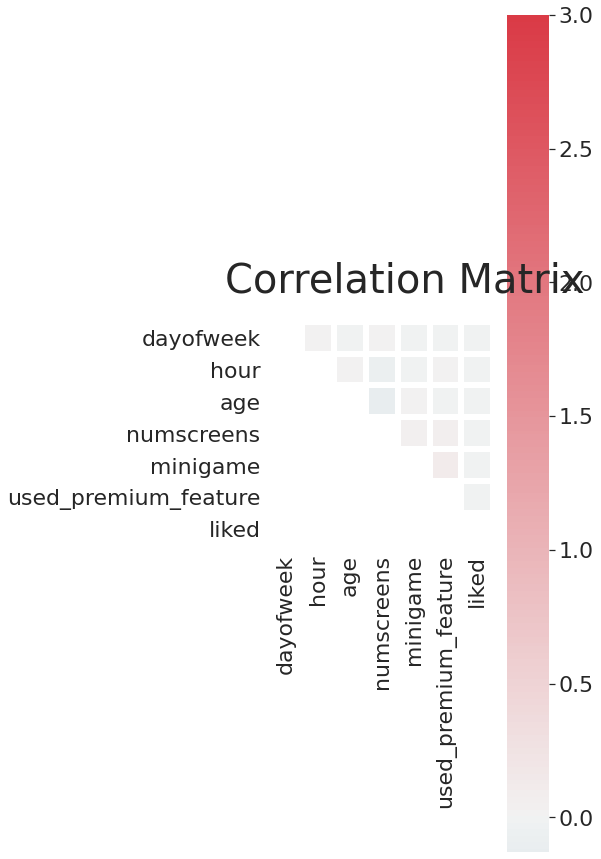

In [9]:
#correlation matrix

sns.set(style= 'white', font_scale= 2)

corr = dataset2.corr()

#generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.tril_indices_from(mask)] = True

#setup matplotlb figure
f, ax = plt.subplots(figsize = (5,5))
f.suptitle('Correlation Matrix', fontsize = 40)

#Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap = True)

#Draw the heatmap with mask and correlation aspect ration
sns.heatmap(corr, mask = mask, cmap= cmap, vmax= 3, center= 0,
            square= True, linewidths= 5, cbar_kws= {'shrink' : 5})

In [10]:
#Feature Engineering

dataset.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int64
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [11]:
dataset["first_open"] = pd.to_datetime(dataset["first_open"])
#dataset["first_open"] = [parser.parse(row_data) for row_data in dataset["first_open"]]
dataset["enrolled_date"] = [parser.parse(row_data) if isinstance(row_data, str) else row_data for row_data in dataset["enrolled_date"]]

In [12]:
dataset.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int64
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [13]:
# Calculate the difference between first_open & enrolled_date. Cast the calculation to timedelta hour
dataset["difference"] = (dataset.enrolled_date - dataset.first_open).astype('timedelta64[h]')
dataset.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int64
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
difference                     float64
dtype: object

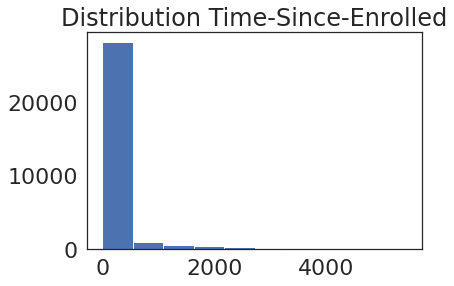

In [14]:
plt.hist(dataset['difference'].dropna())
plt.title('Distribution Time-Since-Enrolled')
plt.show()

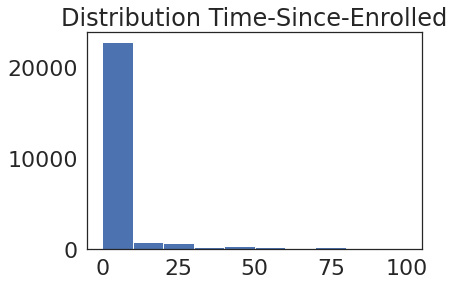

In [15]:
plt.hist(dataset['difference'].dropna(), range=[0,100])
plt.title('Distribution Time-Since-Enrolled')
plt.show()

In [16]:
dataset.loc[dataset.difference>48, 'enrolled'] = 0
dataset = dataset.drop(columns= ['difference', 'enrolled_date', 'first_open'])

In [17]:
#formating the screen-list field
top_screens = pd.read_csv('/content/drive/MyDrive/Machine Learning Models/Redirecting customer to subscription/top_screens.csv')

In [18]:
top_screens

,Unnamed: 0,top_screens
0,0,Loan2
1,1,location
2,2,Institutions
3,3,Credit3Container
4,4,VerifyPhone
5,5,BankVerification
6,6,VerifyDateOfBirth
7,7,ProfilePage
8,8,VerifyCountry
9,9,Cycle


In [19]:
top_screens = top_screens.top_screens.values

In [20]:
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [21]:
dataset['screen_list'] = dataset.screen_list.astype(str) + ','

In [22]:
dataset

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan,",3,0,1,0,1
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,0
49996,169179,1,0,35,"Cycle,Splash,Home,RewardsContainer,",4,0,1,0,0
49997,302367,2,22,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,0
49998,324905,6,12,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,0


In [23]:
for sc in top_screens:
  dataset[sc] = dataset.screen_list.str.contains(sc).astype(int)
  dataset['screen_list'] = dataset.screen_list.str.replace(sc + ",", "")

In [24]:
dataset['others'] = dataset.screen_list.str.count(',')

# Drop columns we dont need anymore
dataset = dataset.drop(columns = ["screen_list"])

In [25]:
#funnel (Grouping screen that belong to same set)
savings_screens = ['Saving1',
                   'Saving2',
                   'Saving2Amount',
                   'Saving4',
                   'Saving5',
                   'Saving6',
                   'Saving7',
                   'Saving8',
                   'Saving9',
                   'Saving10']

dataset['SavingsCount'] = dataset[savings_screens].sum(axis= 1)
dataset = dataset.drop(columns= savings_screens)

In [26]:
cm_screens = ['Credit1',
              'Credit2',
              'Credit3',
              'Credit3Container',
              'Credit3Dashboard']

dataset['CmCounts'] = dataset[cm_screens].sum(axis= 1)
dataset = dataset.drop(columns = cm_screens)

In [27]:
cc_screens = ['CC1',
              'CC1Category',
              'CC3']
dataset['CCCounts'] = dataset[cc_screens].sum(axis= 1)
dataset = dataset.drop(columns= cc_screens)

In [28]:
loans_screens = ['Loan',
                 'Loan2',
                 'Loan3',
                 'Loan4']
dataset['LoansCounts'] = dataset[loans_screens].sum(axis= 1)
dataset = dataset.drop(columns= loans_screens)

In [29]:
dataset

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,Institutions,VerifyPhone,BankVerification,VerifyDateOfBirth,ProfilePage,VerifyCountry,Cycle,idscreen,Splash,RewardsContainer,EditProfile,Finances,Alerts,Leaderboard,VerifyMobile,VerifyHousing,RewardDetail,VerifyHousingAmount,ProfileMaritalStatus,ProfileChildren,ProfileEducation,ProfileEducationMajor,Rewards,AccountView,VerifyAnnualIncome,VerifyIncomeType,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,others,SavingsCount,CmCounts,CCCounts,LoansCounts
0,235136,3,2,23,15,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,13,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,6,0,2,0,0
49996,169179,1,0,35,4,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
49997,302367,2,22,39,25,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0
49998,324905,6,12,27,26,0,0,1,0,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0


In [30]:
dataset.to_csv("/content/drive/MyDrive/Machine Learning Models/Redirecting customer to subscription/new_appdata10.csv", index= False)

<h1>Part 2<h1>

In [31]:
dataset = pd.read_csv("/content/drive/MyDrive/Machine Learning Models/Redirecting customer to subscription/new_appdata10.csv")

In [32]:
dataset

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,Institutions,VerifyPhone,BankVerification,VerifyDateOfBirth,ProfilePage,VerifyCountry,Cycle,idscreen,Splash,RewardsContainer,EditProfile,Finances,Alerts,Leaderboard,VerifyMobile,VerifyHousing,RewardDetail,VerifyHousingAmount,ProfileMaritalStatus,ProfileChildren,ProfileEducation,ProfileEducationMajor,Rewards,AccountView,VerifyAnnualIncome,VerifyIncomeType,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,others,SavingsCount,CmCounts,CCCounts,LoansCounts
0,235136,3,2,23,15,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,13,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,6,0,2,0,0
49996,169179,1,0,35,4,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
49997,302367,2,22,39,25,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0
49998,324905,6,12,27,26,0,0,1,0,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0


In [33]:
#data Preprocessing

response = dataset["enrolled"]
dataset = dataset.drop(columns= 'enrolled')

In [34]:
#Spliting the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dataset, response, test_size= 0.2, random_state= 0)

In [35]:
train_identifier = x_train['user']
x_train.drop(columns= 'user')

test_identifier = x_test['user']
x_test.drop(columns= 'user')

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,VerifyPhone,BankVerification,VerifyDateOfBirth,ProfilePage,VerifyCountry,Cycle,idscreen,Splash,RewardsContainer,EditProfile,Finances,Alerts,Leaderboard,VerifyMobile,VerifyHousing,RewardDetail,VerifyHousingAmount,ProfileMaritalStatus,ProfileChildren,ProfileEducation,ProfileEducationMajor,Rewards,AccountView,VerifyAnnualIncome,VerifyIncomeType,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,others,SavingsCount,CmCounts,CCCounts,LoansCounts
11841,0,1,41,34,0,0,1,1,0,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0
19602,5,6,26,30,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,0,1
45519,0,15,37,11,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,1,0,2
25747,5,19,21,13,0,0,1,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0
42642,5,1,30,32,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,1,1,1,0,1,0,0,0,0,0,0,4,3,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25091,1,22,39,31,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,7,0,0,0,1
27853,0,12,34,15,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,0,1
47278,5,17,27,68,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,5,0,3,2,2
37020,1,3,21,25,0,0,0,1,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,9,0,0,0,0


In [36]:
#feature Scaling

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train2 = pd.DataFrame(sc_x.fit_transform(x_train))
x_test2 = pd.DataFrame(sc_x.fit_transform(x_test))
x_train2.columns = x_train.columns.values
x_test2.columns = x_test.columns.values

x_train2.index = x_train.index.values
x_test2.index = x_test.index.values

In [37]:
x_train = x_train2
x_test = x_test2

In [38]:
x_train.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,VerifyPhone,BankVerification,VerifyDateOfBirth,ProfilePage,VerifyCountry,Cycle,idscreen,Splash,RewardsContainer,EditProfile,Finances,Alerts,Leaderboard,VerifyMobile,VerifyHousing,RewardDetail,VerifyHousingAmount,ProfileMaritalStatus,ProfileChildren,ProfileEducation,ProfileEducationMajor,Rewards,AccountView,VerifyAnnualIncome,VerifyIncomeType,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,others,SavingsCount,CmCounts,CCCounts,LoansCounts
20330,1.193341,-0.504961,1.000837,0.025525,-1.026726,-0.346830,2.186018,2.246319,-1.039218,-0.644848,-1.052581,-0.687611,-0.951190,-0.434608,-0.858628,-0.758526,-0.718780,-0.503747,-0.303366,-0.226747,-0.288018,-0.282122,-0.234146,-0.238627,-0.217955,-0.178191,-0.208406,-0.224176,0.0,-0.218583,-0.207096,-0.15631,-0.162979,-0.155384,-0.181965,-0.151889,-0.176090,-0.148055,3.035970,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-1.147303,-0.260877,-0.763372,-0.289185,1.785389
17532,-0.776427,-0.997389,1.135280,-0.898034,1.328829,2.883254,-0.457453,-0.445173,0.962262,1.550753,0.950046,1.454312,1.051315,-0.434608,1.164649,1.318347,1.391246,1.985123,3.296349,-0.226747,-0.288018,-0.282122,-0.234146,-0.238627,-0.217955,-0.178191,-0.208406,-0.224176,0.0,-0.218583,-0.207096,-0.15631,-0.162979,-0.155384,-0.181965,-0.151889,5.678927,-0.148055,-0.329384,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.839740,-0.260877,0.057524,-0.289185,0.309800
45819,1.726909,-1.489818,-1.150250,-0.528611,4.066366,2.883254,-0.457453,-0.445173,-1.039218,1.550753,-1.052581,1.454312,-0.951190,2.300925,-0.858628,1.318347,1.391246,1.985123,3.296349,-0.226747,-0.288018,3.544562,4.270834,-0.238627,-0.217955,5.611943,-0.208406,-0.224176,0.0,-0.218583,-0.207096,-0.15631,6.135743,-0.155384,-0.181965,-0.151889,-0.176090,-0.148055,-0.329384,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.025092,-0.260877,0.878421,1.336593,1.785389
34807,1.269491,0.479896,0.059736,-0.620967,0.182883,2.883254,-0.457453,-0.445173,0.962262,-0.644848,-1.052581,-0.687611,-0.951190,-0.434608,-0.858628,-0.758526,-0.718780,-0.503747,-0.303366,-0.226747,-0.288018,-0.282122,-0.234146,-0.238627,-0.217955,-0.178191,-0.208406,-0.224176,0.0,-0.218583,-0.207096,-0.15631,-0.162979,-0.155384,-0.181965,-0.151889,-0.176090,-0.148055,-0.329384,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.025092,-0.260877,-0.763372,-0.289185,0.309800
31888,0.571812,-0.012532,0.463065,1.687932,-0.644744,-0.346830,-0.457453,-0.445173,0.962262,-0.644848,0.950046,-0.687611,1.051315,-0.434608,-0.858628,1.318347,1.391246,1.985123,-0.303366,-0.226747,-0.288018,-0.282122,-0.234146,-0.238627,-0.217955,-0.178191,-0.208406,-0.224176,0.0,-0.218583,-0.207096,-0.15631,-0.162979,-0.155384,-0.181965,-0.151889,-0.176090,-0.148055,-0.329384,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-0.875753,-0.260877,0.878421,-0.289185,-1.165789


In [39]:
# Model building
from sklearn.linear_model import LogisticRegression
# LogisticRegression using L1
# --> link: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# To avoid the correlation between the screen we use the l1 regularization
classifier = LogisticRegression(random_state=0, penalty = 'l2')

# train model
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix : " , cm)

acc = accuracy_score(y_test, y_pred)
print('accuracy_score : ', acc)

ps = precision_score(y_test, y_pred)
print("Precision Score : ", ps)

rs = recall_score(y_test, y_pred)
print("Recall Score : ", rs)

f1 = f1_score(y_test, y_pred)
print("f1_score : " ,f1)

Confusion matrix :  [[3880 1192]
 [1128 3800]]
accuracy_score :  0.768
Precision Score :  0.7612179487179487
Recall Score :  0.7711038961038961
f1_score :  0.7661290322580644


Test data Accuracy : 0.7680


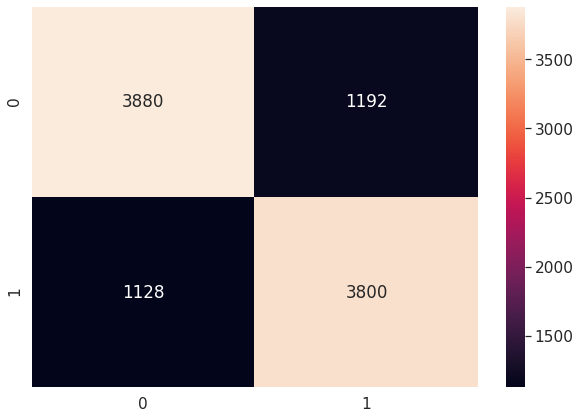

In [41]:
df_cm = pd.DataFrame(cm, index = (0,1), columns = (0,1))
plt.figure(figsize= (10,7))
sns.set(font_scale= 1.4)
sns.heatmap(df_cm, annot= True, fmt='g')
print("Test data Accuracy : %0.4f" %accuracy_score(y_test, y_pred))

In [42]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X= x_train, y= y_train)

print("Logistic Accuracy: %0.3f (+/- %0.3f)" %(accuracies.mean(), accuracies.std()*2))

Logistic Accuracy: 0.767 (+/- 0.005)


In [43]:
#conclusion
final_results = pd.concat([y_test,test_identifier], axis= 1).dropna()
final_results['predicted_result'] = y_pred
final_results[['user','enrolled','predicted_result']].reset_index(drop = True)

,user,enrolled,predicted_result
0,239786,1,1
1,279644,1,1
2,98290,0,0
3,170150,1,1
4,237568,1,1
...,...,...,...
9995,143036,1,0
9996,91158,1,1
9997,248318,0,0
9998,142418,1,1
